In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.axes as axt
import glob
import anndata
import bbknn
import celltypist 
from celltypist import models

/home/william/miniconda3/envs/scenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = '../data/SCP1884/'

In [3]:
adata = sc.read_h5ad(data_path + 'SCP1884.epi.h5ad')

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.87
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 6.1%
	Estimated  = 0.3%
Elapsed time: 262.0 seconds
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 25.8%
Overall doublet rate:
	Expected   = 6.1%
	Estimated  = 5.2%


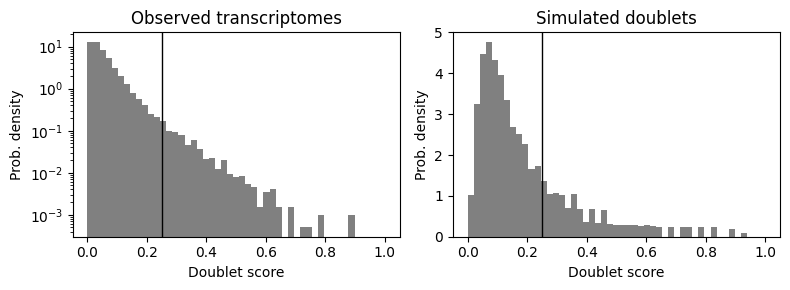

In [4]:
import scrublet as scr
scrub = scr.Scrublet(adata.X,expected_doublet_rate=0.061)
scrub.scrub_doublets(min_counts=2,min_cells=3,min_gene_variability_pctl=85,n_prin_comps=30)
scrub.call_doublets(threshold=0.25)
scrub.plot_histogram()
adata.obs['doublet_scores'] = scrub.doublet_scores_obs_
adata.obs['predicted_doublets'] = scrub.predicted_doublets_


In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=5)


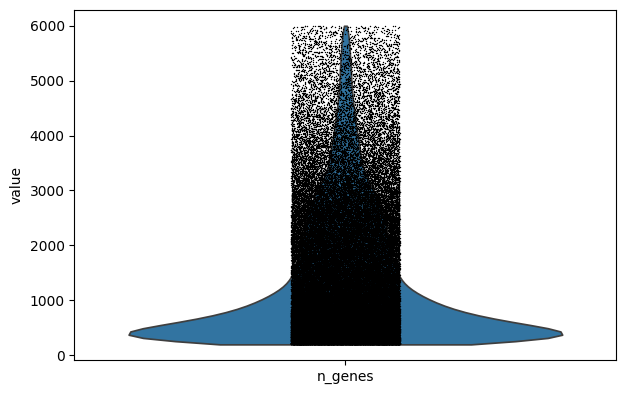

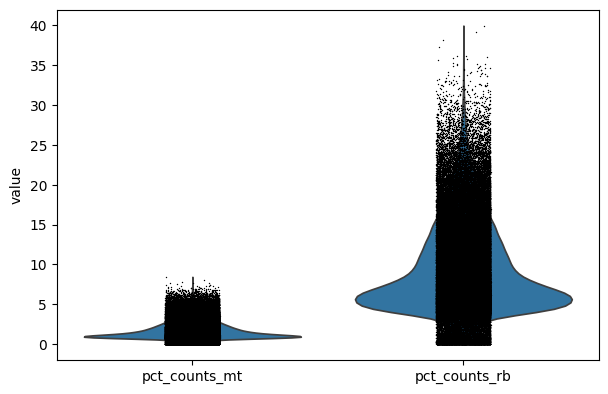

In [6]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['rb'] = adata.var_names.str.startswith(('RPS','RPL'))
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['rb'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata,['n_genes'])
sc.pl.violin(adata,['pct_counts_mt','pct_counts_rb'])


In [7]:
adata.write_h5ad(data_path + 'SCP1884.epi.qc.h5ad')